## Manual implementation of the Mamdani

#### Import libs

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mfs import trapezoidal, triangular

#### Define MFs
im using my own mf functions from last examples.<br/>
functions available in file named : mfs.py

In [49]:
def x_y_small(val):
    return trapezoidal(val, -10, -10, -2.5, 2.5)  

def x_y_large(val):
    return trapezoidal(val, -2.5, 2.5, 10, 10) 

In [50]:
def z_negative_large(z):
    return triangular(z, -5, -2.5, 0)

def z_negative_small(z):
    return triangular(z, -2.5, -1.0, 0.5)

def z_positive_small(z):
    return triangular(z, -0.5, 1.0, 2.5)

def z_positive_large(z):
    return triangular(z, 0, 2.5, 5)

#### Mamdani FIS

Mamdani fuzzy inference system involves four main steps:

<strong>Fuzzification </strong>– converting crisp inputs into fuzzy values.

<strong>Rule Evaluation</strong> – applying fuzzy logic rules to determine output fuzzy sets.

<strong>Aggregation</strong> – combining the outputs of all rules.

<strong>Defuzzification</strong> – converting the aggregated fuzzy output into a crisp value.

In [55]:
def mamdani_inference(x_input, y_input):

    # Fuzzification
    x_is_small = x_y_small(x_input)
    x_is_large = x_y_large(x_input)
    y_is_small = x_y_small(y_input)
    y_is_large = x_y_large(y_input)

    # Rule Evaluation
    w1 = min(x_is_small, y_is_small)
    w2 = min(x_is_small, y_is_large)
    w3 = min(x_is_large, y_is_small)
    w4 = min(x_is_large, y_is_large)

    # Aggregation
    z_universe = np.linspace(-5, 5, 501)
    aggregated_membership = np.zeros_like(z_universe)
    for i, z in enumerate(z_universe):
        out1 = min(w1, z_negative_large(z))
        out2 = min(w2, z_negative_small(z))
        out3 = min(w3, z_positive_small(z))
        out4 = min(w4, z_positive_large(z))

        aggregated_membership[i] = max(out1, out2, out3, out4)

    # Defuzzification (using Centroid Method)
    denominator = np.sum(aggregated_membership)
    if denominator == 0:
        return 0, z_universe, aggregated_membership

    numerator = np.sum(z_universe * aggregated_membership)

    crisp_output = numerator / denominator

    return crisp_output, z_universe, aggregated_membership

#### Output

In [52]:
crisp_z1, z_univ1, agg_mem1 = mamdani_inference(0, 0)
print(f"x=0, y=0, output is = {crisp_z1:.4f}")

crisp_z2, z_univ2, agg_mem2 = mamdani_inference(4, 3)
print(f"x=4, y=3, output is = {crisp_z2:.4f}")

x=0, y=0, output is = -0.0000
x=4, y=3, output is = 2.5000


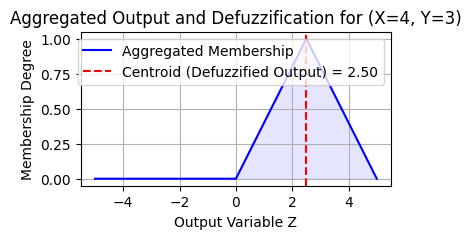

In [54]:
plt.figure(figsize=(4, 2))
plt.plot(z_univ2, agg_mem2, 'b', linewidth=1.5, label='Aggregated Membership')
plt.fill_between(z_univ2, 0, agg_mem2, color='b', alpha=0.1)
plt.axvline(x=crisp_z2, color='r', linestyle='--', label=f'Centroid (Defuzzified Output) = {crisp_z2:.2f}')
plt.title('Aggregated Output and Defuzzification for (X=4, Y=3)')
plt.xlabel('Output Variable Z')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()